# Import Data

In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv("Social_Network_Ads.csv")
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
68,15577178,Female,22,63000,0
274,15692819,Female,57,26000,1
394,15757632,Female,39,59000,0


# EDA

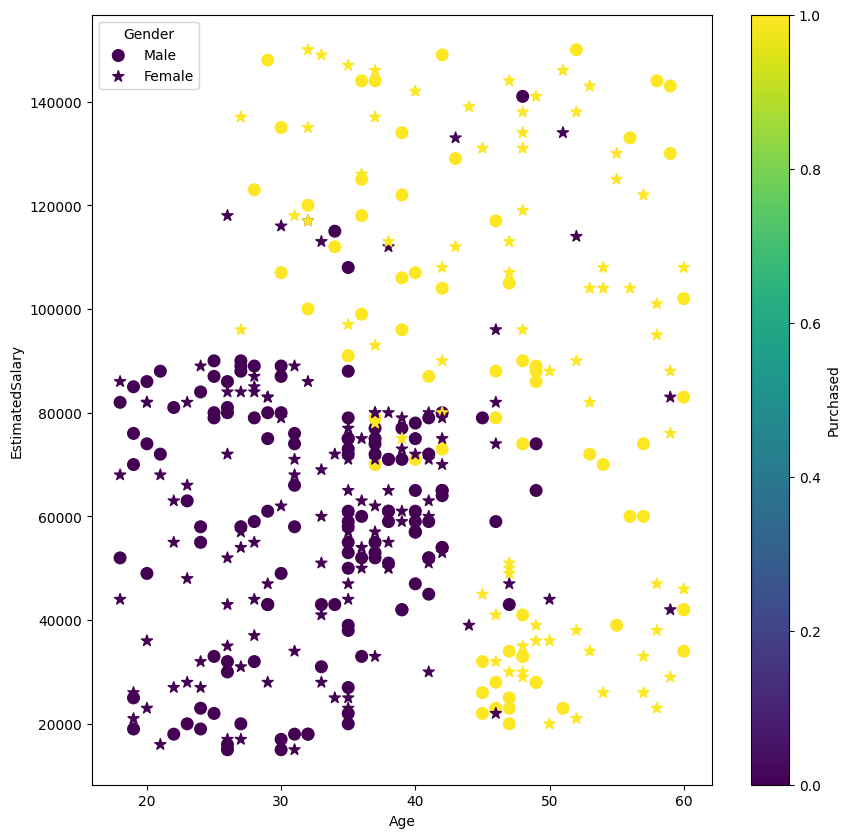

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define marker styles for different genders
markers = {'Male': 'o', 'Female': '*'}  # 'o' for circles, 's' for squares

# Initialize a list to store scatter plots
scatter_plots = []

# Plot each gender separately
for gender, marker in markers.items():
    subset = df[df['Gender'] == gender]
    scatter = ax.scatter(subset['Age'], subset['EstimatedSalary'], c=subset['Purchased'], cmap='viridis', 
                        marker=marker, label=gender, s=70)  # s parameter adjusts the point size
    scatter_plots.append(scatter)  # Add scatter plot to the list

# Add color bar based on the last scatter plot
cbar = plt.colorbar(scatter_plots[-1], ax=ax, label='Purchased')

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')

# Add legend
ax.legend(title='Gender')

plt.show()

In [81]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0).astype('int')

### Split Data into Independent and Dependent Features

In [82]:
X = df.iloc[:, 1:4].values
print(type(X), X.shape)

<class 'numpy.ndarray'> (400, 3)


In [83]:
y = df.iloc[:, -1].values
print(type(y), y.shape)

<class 'numpy.ndarray'> (400,)


### Split Data into Training and Testing

In [84]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state=0)

xtrain, xtest = xtrain.astype(np.float32), xtest.astype(np.float32)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(320, 3)
(80, 3)
(320,)
(80,)


### Scale the Input Columns

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = [1, 2]

In [86]:
columns = xtrain[:, columns_to_scale]
scaled_columns = scaler.fit_transform(columns)
xtrain[: , columns_to_scale] = scaled_columns
xtrain[0]

array([1.       , 1.92295  , 2.1460156], dtype=float32)

In [87]:
columns = xtest[:, columns_to_scale]
scaled_columns = scaler.transform(columns)
xtest[: , columns_to_scale] = scaled_columns
xtest[0]

array([ 1.        , -0.79895085,  0.4946076 ], dtype=float32)

# Training & Testing

### Approach 1: k=sqrt(n)

In [88]:
k = int(np.sqrt(xtrain.shape[0]))
print(xtrain.shape[0],k)

320 17


In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

In [90]:
# Train
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=17)

In [91]:
# Test
xpred = knn.predict(xtest)
xpred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [92]:
# Calculating Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

acc = accuracy_score(xpred, ytest)
cm = confusion_matrix(xpred, ytest)
ps = precision_score(xpred, ytest)

print("Accuracy: ", acc)
print("Confusion Matrix:\n", cm)
print("Precision Score: ", ps)


Accuracy:  0.95
Confusion Matrix:
 [[55  1]
 [ 3 21]]
Precision Score:  0.9545454545454546


### Aproach 2: Hit and trial

In [93]:
# Train & Test
accs = []

for k in range(1, 52, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    xpred = knn.predict(xtest)
    accs.append(accuracy_score(xpred, ytest))

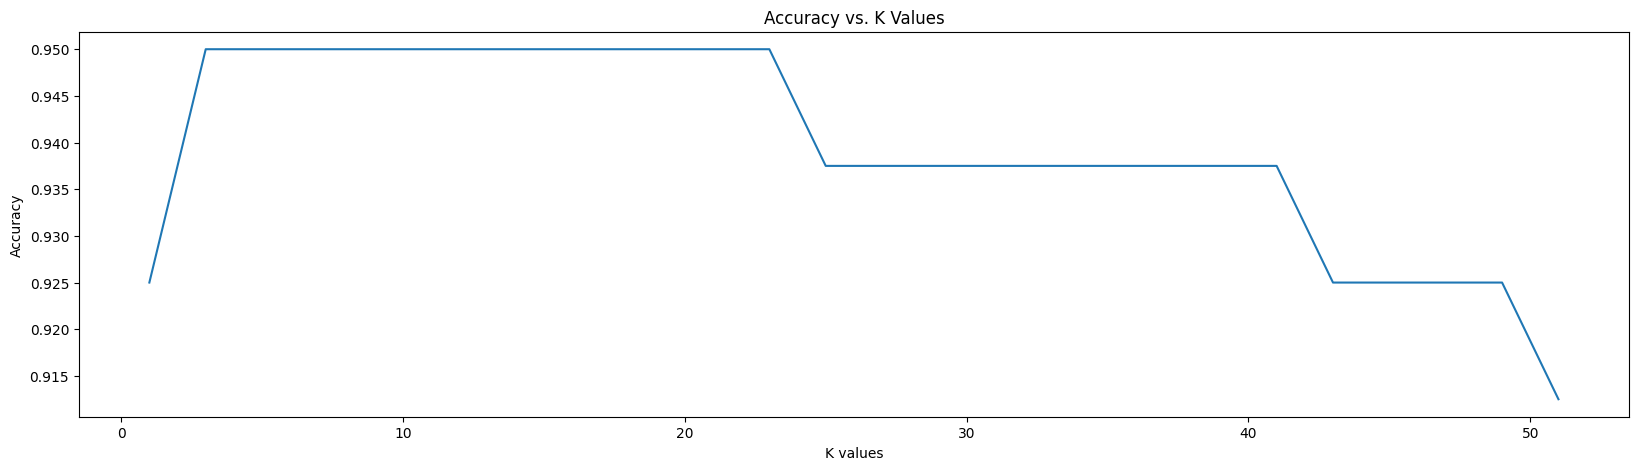

In [94]:
#Metrics Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(list(range(1, 52, 2)), accs)
# Adding labels and title
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Values')

# Adding a legend
# plt.legend()
plt.show()

# Predicting New Data

Based on the "Accuracy vs. K Values" plot we will initialize KNN with 15 neighbours

In [95]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [96]:
def predict_knn(age, salary, gender):
    gen = 1 if gender == "Male" else 0

    input = np.array(([gen],[age],[salary])).reshape(1, 3)
    columns = input[: , columns_to_scale]
    scaled_columns = scaler.transform(columns)
    input[:, columns_to_scale] = scaled_columns

    return "Will Purchase" if knn.predict(input)[0] else "Will Not Purchase"

print(predict_knn(37, 500000, "Female"))
print(predict_knn(37, 50000, "Female"))

Will Purchase
Will Not Purchase


# Decision Boundary

Since decision boundary can be only visualized in 2d plane we will consider only 2 features(Salary and Age).

### Divide Input and Output Column

In [97]:
X = df.iloc[:, 2:4].values
print(type(X), X.shape)

<class 'numpy.ndarray'> (400, 2)


In [98]:
y = df.iloc[:, -1].values
print(type(y), y.shape)

<class 'numpy.ndarray'> (400,)


### Divide Training and Testing Data

In [99]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state=42)

xtrain, xtest = xtrain.astype(np.float32), xtest.astype(np.float32)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(320, 2)
(80, 2)
(320,)
(80,)


### Scale the Input Columns

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
xtrain = scaler.fit_transform(xtrain)
xtrain[0]

array([-1.0667524 , -0.38634437], dtype=float32)

In [102]:
xtest = scaler.fit_transform(xtest)
xtest[0]

array([ 0.80285746, -1.3964971 ], dtype=float32)

### Training and Testing

In [103]:
# Train & Test
accs = []

for k in range(1, 52, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    xpred = knn.predict(xtest)
    accs.append(accuracy_score(xpred, ytest))

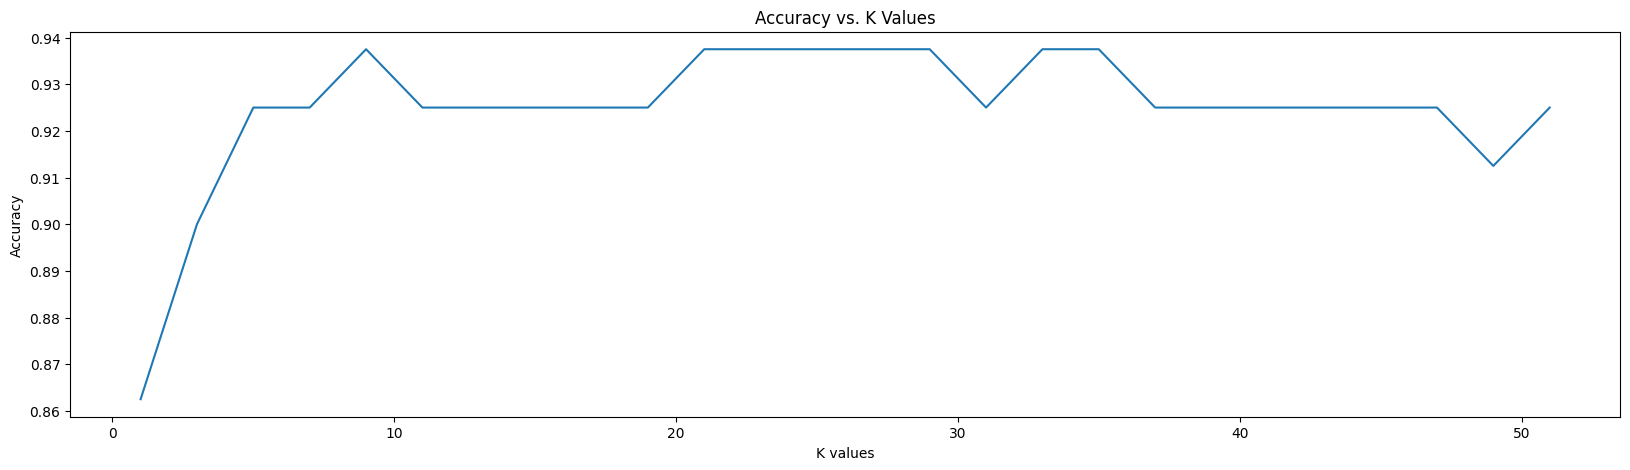

In [104]:
#Metrics Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(list(range(1, 52, 2)), accs)
# Adding labels and title
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Values')

# Adding a legend
# plt.legend()
plt.show()

Based on the "Accuracy vs. K Values" plot we will initialize KNN with 11 neighbours

In [105]:
# Train
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=9)

### Generating Numpy Meshgrid

In [106]:
a = np.arange(start = xtrain[:, 0].min()-1 , stop = xtrain[:, 0].max()+1, step = 0.01)
b = np.arange(start = xtrain[:, 1].min()-1 , stop = xtrain[:, 1].max()+1, step = 0.01)
# print(a[0], b[0])
xx, yy = np.meshgrid(a, b)

xx.shape

(593, 613)

In [107]:
# Input Data of Mesh Grid
input = np.array([xx.ravel(), yy.ravel()]).T
input

array([[-2.9498359 , -2.60810173],
       [-2.9398359 , -2.60810173],
       [-2.9298359 , -2.60810173],
       ...,
       [ 3.1501641 ,  3.31189827],
       [ 3.1601641 ,  3.31189827],
       [ 3.1701641 ,  3.31189827]])

In [108]:
# Prediction of Mesh Grid
results = knn.predict(input)

In [109]:
# Contour expects all the arrays to be of same shape
print(xx.shape, yy.shape, results.shape, results.reshape(xx.shape).shape)

(593, 613) (593, 613) (363509,) (593, 613)


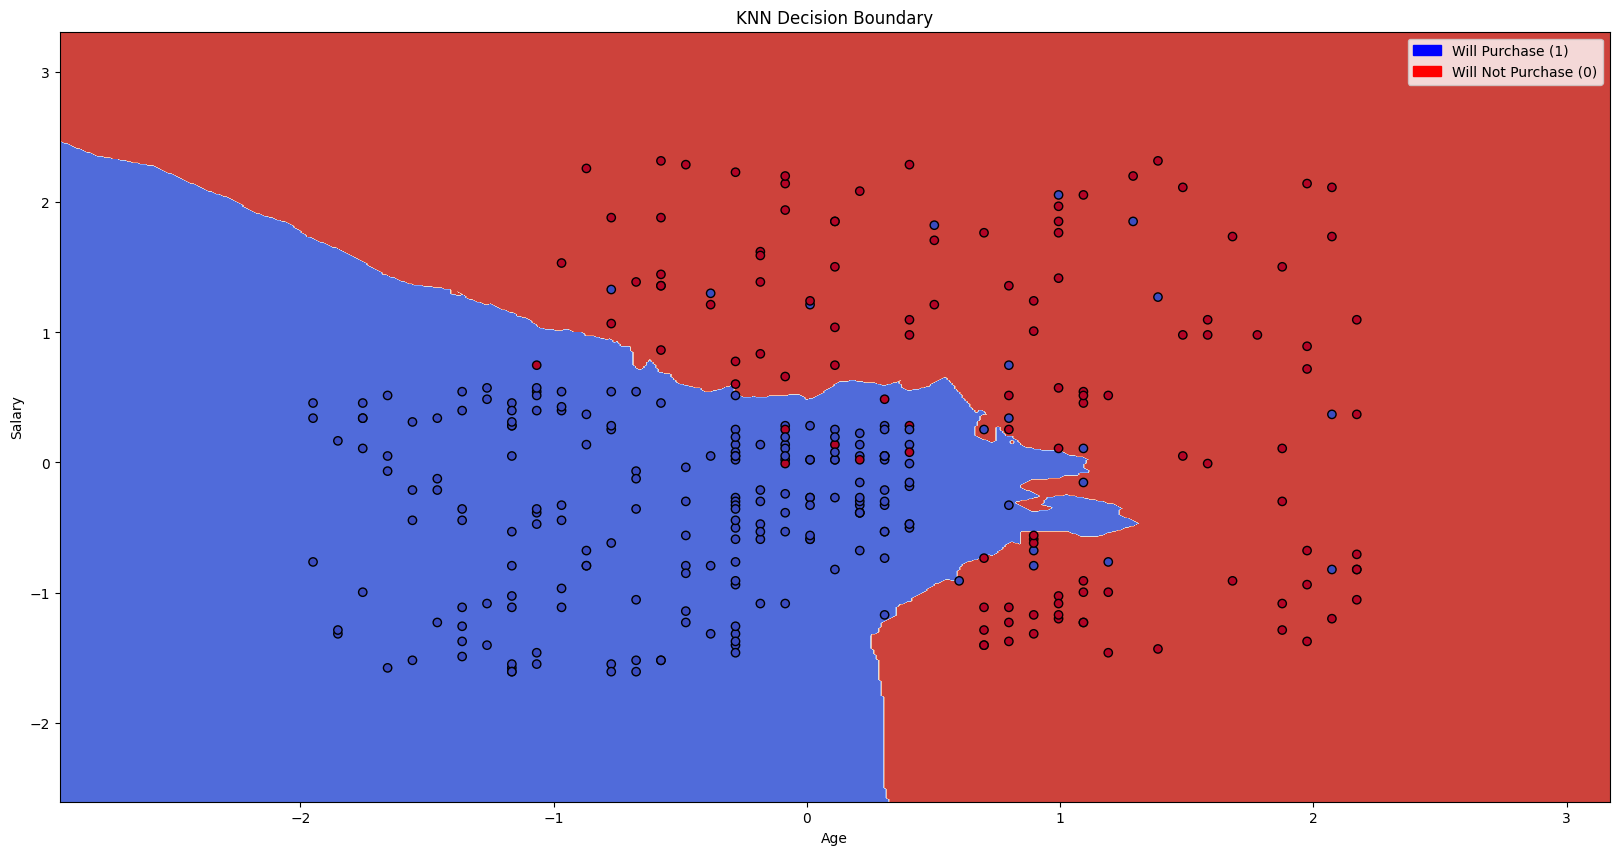

In [110]:
import matplotlib.patches as patches


plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, results.reshape(xx.shape), cmap = 'coolwarm') # Chnage the shape of results to match with xx and yy
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap='coolwarm', edgecolors='k') 
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Decision Boundary')
# Create custom legend handles
handles = [
    patches.Patch(color='blue', label='Will Purchase (1)'),
    patches.Patch(color='red', label='Will Not Purchase (0)')
]
plt.legend(handles=handles, loc='best')

plt.show()

# Effect of K on Train and Test Error Rate

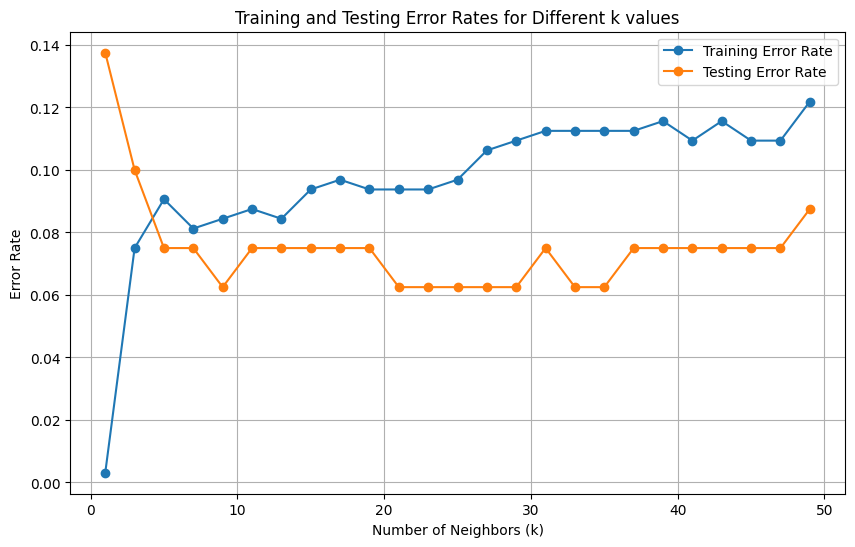

In [113]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List of k values to test
k_values = range(1, 51, 2)

# Initialize lists to store error rates
training_errors = []
testing_errors = []ss

for k in k_values:
    # Create and fit the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    
    # Predict on training and testing data
    train_predictions = knn.predict(xtrain)
    test_predictions = knn.predict(xtest)
    
    # Compute accuracy (1 - error rate)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    
    # Compute error rates
    training_errors.append(1 - train_accuracy)
    testing_errors.append(1 - test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_errors, marker='o', label='Training Error Rate')
plt.plot(k_values, testing_errors, marker='o', label='Testing Error Rate')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Testing Error Rates for Different k values')
plt.legend()
plt.grid(True)
plt.show()
